In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Read Data
Data = pd.read_csv('Housing.csv')
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#Check Data Information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#Perform Descriptive Statistics
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Check Unique Values of every row for every column
N = Data.nunique(axis = 0)
print(f'Number of Unique Values in Every Column:\n{N}\n')

Number of Unique Values in Every Column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64



In [6]:
#Count NaN Values in Data
CountNaN = Data.isna().sum()
print(f'Number of Missing Values in Every Variable:\n{CountNaN}\n')

Number of Missing Values in Every Variable:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



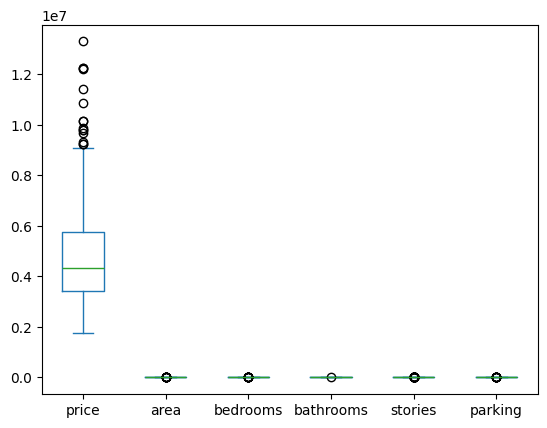

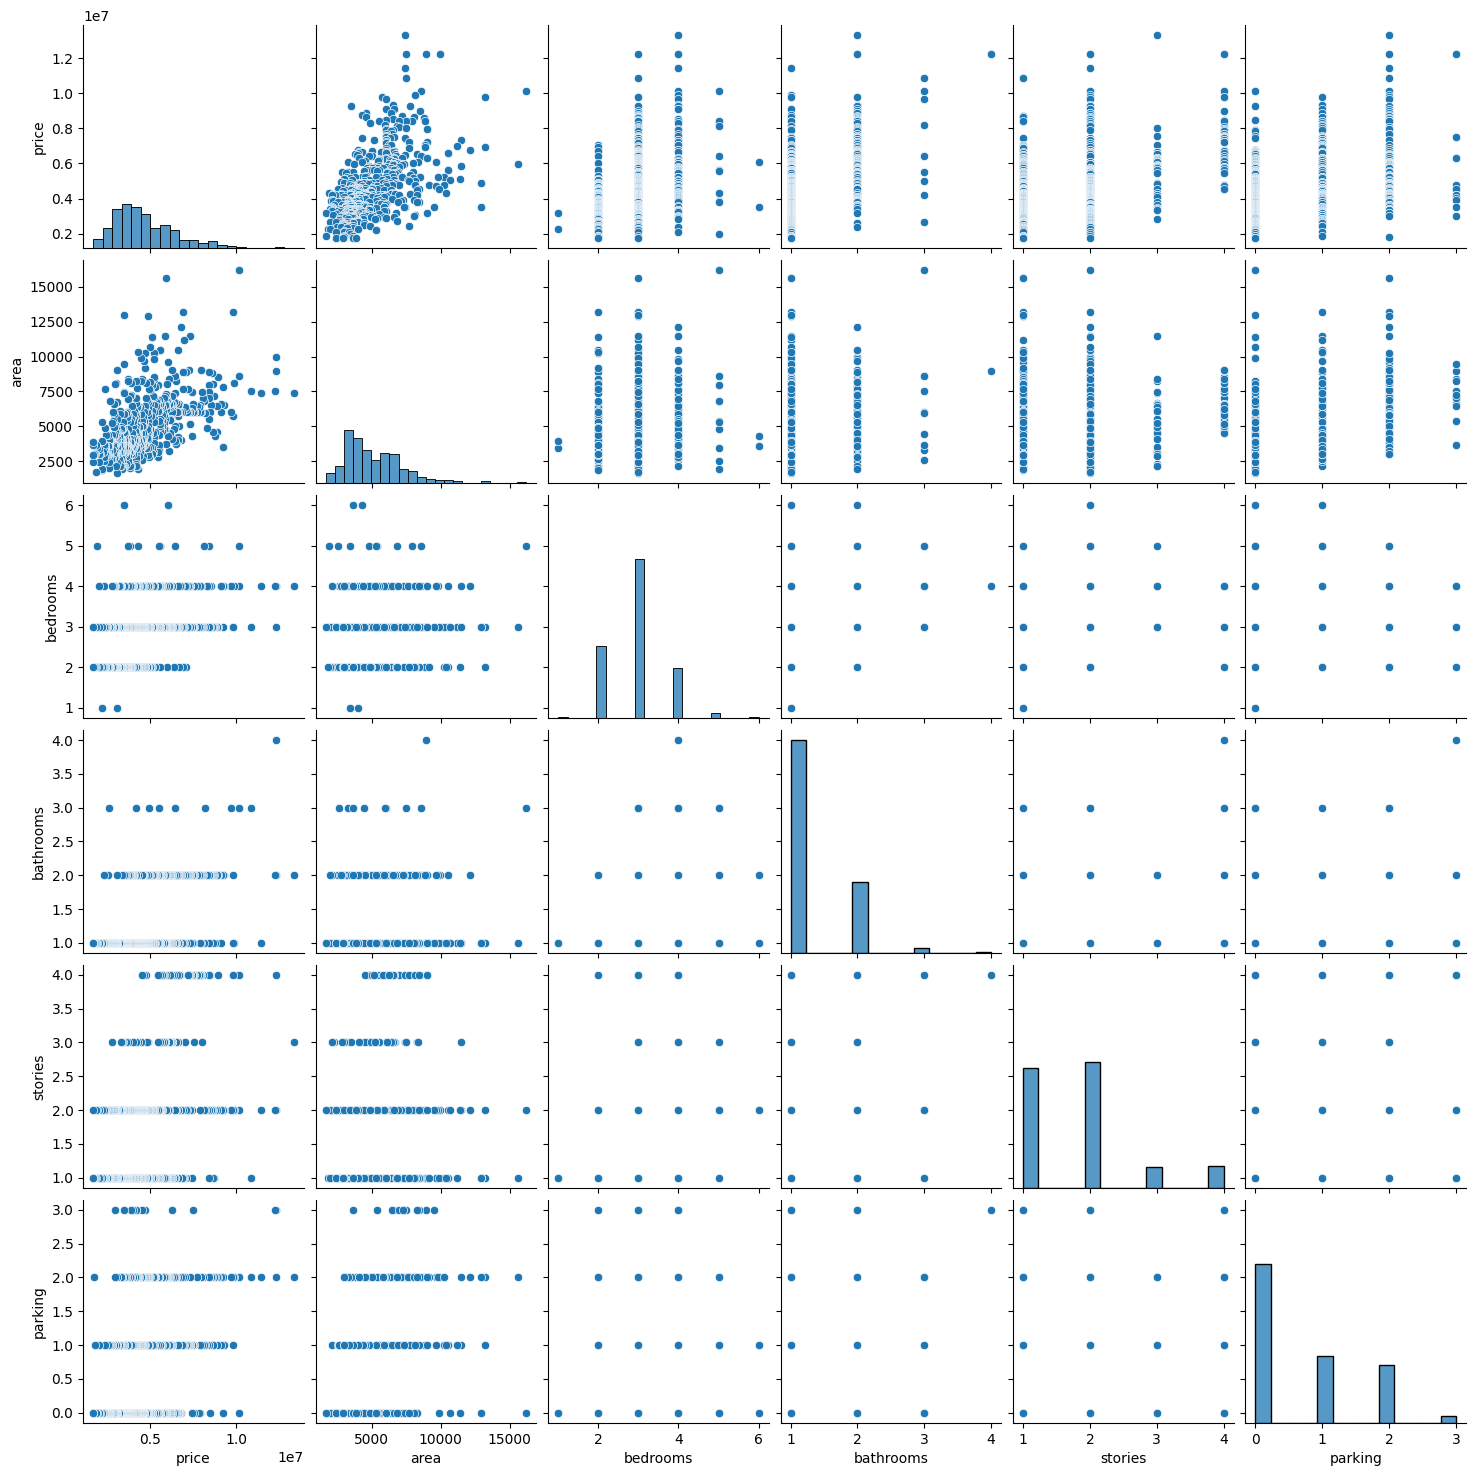

In [7]:
#Pair Plot Visualisation
Data.plot.box(column = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
                      'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'])
sns.pairplot(Data)
plt.show()

In [8]:
#Data Normalisation
Scaler = MinMaxScaler()
SC = ['price', 'area']
Data[SC] = Scaler.fit_transform(Data[SC])
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,0.909091,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,0.909091,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,0.906061,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,0.836364,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,0.001485,0.051546,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,0.000000,0.135395,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,0.000000,0.086598,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
#Preparing Model Training/Testing Data
X = Data.drop('price', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = Data['price']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [10]:
#Model Training and Testing
Regressor = LinearRegression()
Regressor.fit(X_Train, Y_Train)
Y_Pred = Regressor.predict(X_Test)

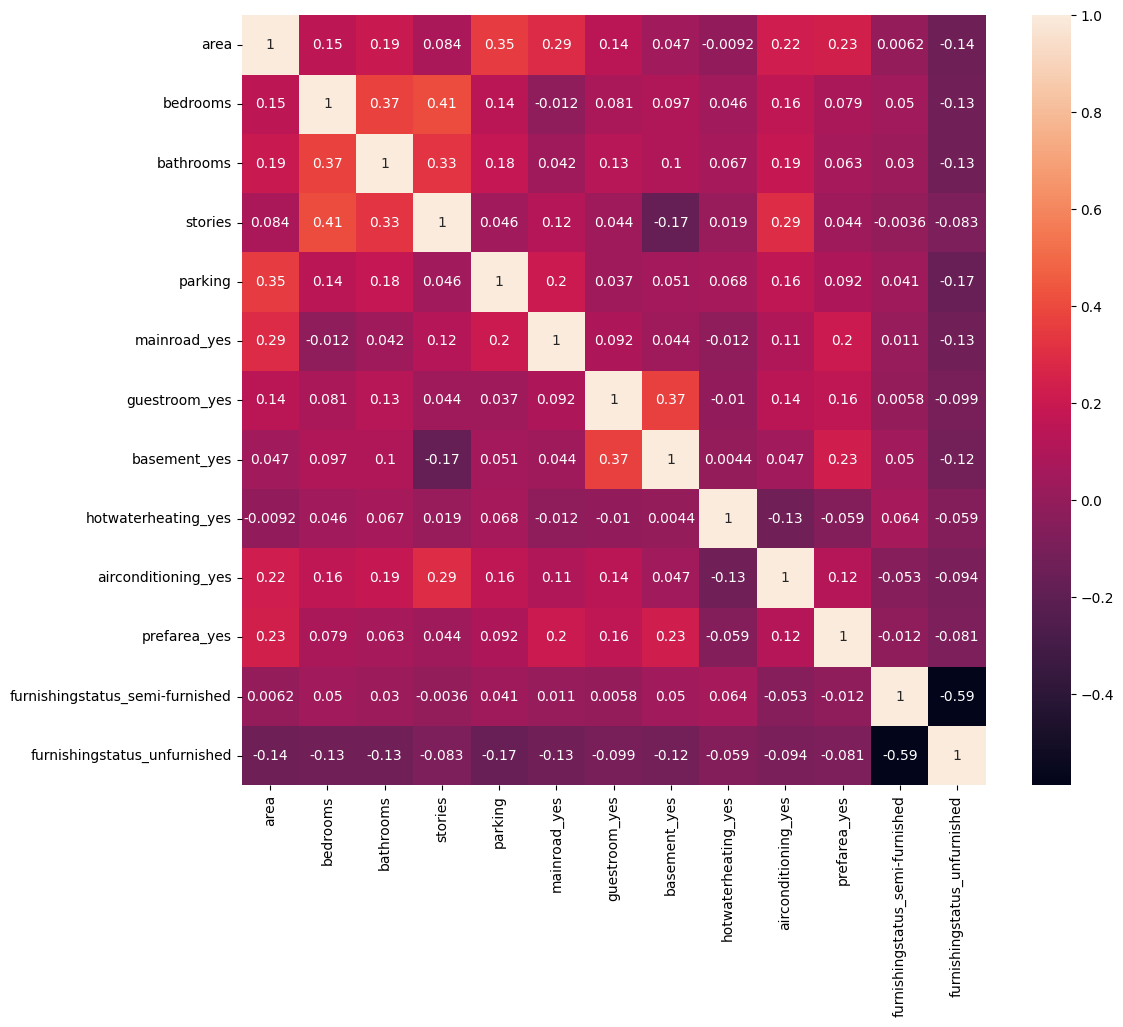

In [11]:
#Heatmap Visualisation
plt.figure(figsize=(12,10))
Correlation = X.corr()
sns.heatmap(Correlation, annot = True)
plt.show()

In [12]:
X_Train

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
145,0.230241,3,1,4,0,True,False,False,False,False,False,False,False
231,0.183505,3,1,1,0,True,False,False,False,False,True,True,False
537,0.003436,3,1,2,0,True,False,False,False,False,False,False,True
437,0.290722,3,1,1,1,True,False,False,False,False,False,False,True
475,0.092784,2,1,2,0,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.123711,3,1,2,0,True,False,True,False,False,False,True,False
240,0.150515,3,1,2,1,True,False,False,False,False,True,True,False
394,0.125773,3,1,1,0,False,False,False,False,True,False,False,True
252,0.564261,3,1,1,0,True,False,False,False,False,False,True,False


In [13]:
X_Test

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
48,0.182131,3,2,2,1,True,False,True,False,False,False,False,True
373,0.092784,2,1,2,0,True,False,False,False,True,False,False,False
197,0.079038,3,2,2,1,False,False,True,False,True,False,True,False
208,0.090722,3,1,3,0,True,False,False,False,False,False,True,False
415,0.215464,3,1,2,1,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0.112715,2,1,1,1,True,False,False,True,False,False,False,False
470,0.235464,3,1,1,0,False,False,False,False,False,False,False,True
375,0.296220,3,1,2,0,True,True,True,False,False,False,False,True
544,0.151203,3,1,2,0,True,False,False,False,False,False,False,True


In [14]:
Y_Train

145    0.333333
231    0.254545
537    0.012121
437    0.133333
475    0.104848
         ...   
450    0.121212
240    0.245455
394    0.151515
252    0.239394
115    0.369697
Name: price, Length: 381, dtype: float64

In [15]:
Y_Test

48     0.493939
373    0.163636
197    0.277576
208    0.272727
415    0.142424
         ...   
334    0.187879
470    0.109091
375    0.163636
544    0.000000
23     0.596970
Name: price, Length: 164, dtype: float64

In [16]:
Y_Pred

array([0.27536549, 0.21782463, 0.32131172, 0.1716824 , 0.34838083,
       0.14474534, 0.16489207, 0.35693113, 0.30683108, 0.23714664,
       0.16046696, 0.20244172, 0.26830127, 0.41419003, 0.25510717,
       0.21869629, 0.23682089, 0.09359562, 0.34156791, 0.11274292,
       0.11226063, 0.20787929, 0.23911332, 0.35645929, 0.13931331,
       0.13660973, 0.42517593, 0.69041551, 0.31854671, 0.34165428,
       0.34329405, 0.18836536, 0.13343827, 0.1060214 , 0.0685395 ,
       0.53429317, 0.25984455, 0.39725762, 0.02351423, 0.29904975,
       0.27982714, 0.15561744, 0.21499206, 0.3480597 , 0.10175957,
       0.37797685, 0.16455581, 0.34535563, 0.39944745, 0.48554538,
       0.48289206, 0.40724359, 0.16986385, 0.28932333, 0.50346795,
       0.16422631, 0.0942471 , 0.34972896, 0.12088389, 0.30940141,
       0.32917186, 0.21501535, 0.03595742, 0.15617891, 0.26852106,
       0.41888856, 0.07009534, 0.33861759, 0.31388164, 0.19402461,
       0.20677168, 0.07283872, 0.28562048, 0.23170094, 0.19184

In [17]:
#Model Evaluation
MSE = mean_squared_error(Y_Test, Y_Pred)
MAE = mean_absolute_error(Y_Test, Y_Pred)
RMSE = np.sqrt(MSE)

In [18]:
MSE

0.008545713354149864

In [19]:
MAE

0.06871958361711097

In [20]:
RMSE

0.09244302761241577

In [19]:
#Make Table Displaying Predicted vs Actual Price Values
Table = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Pred})
print(Table)

       Actual  Predicted
48   0.493939   0.275365
373  0.163636   0.217825
197  0.277576   0.321312
208  0.272727   0.171682
415  0.142424   0.348381
..        ...        ...
334  0.187879   0.222239
470  0.109091   0.074411
375  0.163636   0.223130
544  0.000000   0.122661
23   0.596970   0.431014

[164 rows x 2 columns]


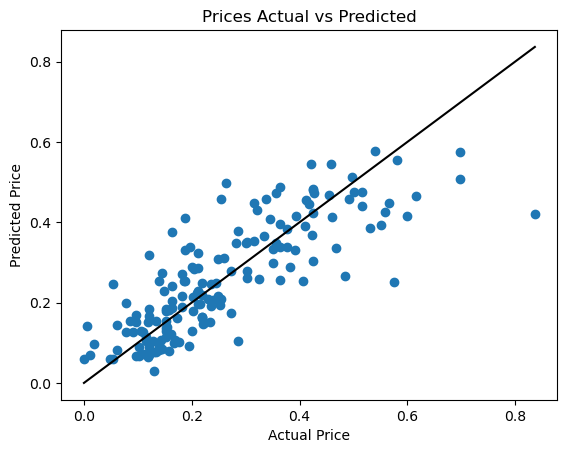

In [21]:
#Scatter Plot Visualisation
plt.scatter(Y_Test, Y_Pred)
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color = 'black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Prices Actual vs Predicted")
plt.show()